#**Dinky Mishra**
#**CIS 660 | Data Mining**
#**2864923**
#**Lab 4.1 - Credit Card Clustering**

# Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls '/content/drive/MyDrive/Colab Notebooks/datamining/lab04/DataSet_CustomerCreditcardUsageGENERAL.csv'

'/content/drive/MyDrive/Colab Notebooks/datamining/lab04/DataSet_CustomerCreditcardUsageGENERAL.csv'


# **1. Determine Data preprocessing methods to apply for each of your Clustering Algorithm**

# Step 1: Data Preprocessing

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Loading the CSV file
df_credit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datamining/lab04/DataSet_CustomerCreditcardUsageGENERAL.csv')
print(df_credit.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [8]:
if 'CUST_ID' in df_credit.columns:
    df_credit = df_credit.drop(columns=['CUST_ID'])

In [9]:
column_data_types = df_credit.dtypes

# Print the data types
print(column_data_types)

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [10]:
non_numeric_columns = df_credit.select_dtypes(exclude=['number']).columns
non_numeric_columns


Index([], dtype='object')

In [11]:
le = LabelEncoder()

# Apply label encoder on each categorical column
for col in non_numeric_columns:
    df_credit[col] = le.fit_transform(df_credit[col])

In [12]:
df_credit.dtypes

,0
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64
CASH_ADVANCE_FREQUENCY,float64


**Imputing :** Imputing is a technique used to fill in missing values in a dataset. When there are gaps in the data—whether due to errors during collection or processing—it can cause issues for machine learning algorithms since most aren't equipped to handle missing data. Imputation helps solve this problem by replacing missing values with estimates, like the mean or median, so the analysis can continue without disruption. This process ensures that your data is complete and usable for modeling.

In [13]:
# Import SimpleImputer for handling missing values, and StandardScaler for feature scaling
from sklearn.impute import SimpleImputer  # Import SimpleImputer to handle missing data
from sklearn.preprocessing import StandardScaler  # Import StandardScaler to standardize features
import numpy as np  # Import numpy for handling arrays and NaN values

# Create an imputer object with a mean filling strategy
# This means any missing (NaN) values will be replaced with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer to the df_credit dataset to fill in missing values
# The fit_transform() method first calculates the mean of the columns (ignoring NaNs)
# and then applies the imputation to replace NaNs with those calculated mean values
df_credit_imputed = imputer.fit_transform(df_credit)

# Now apply StandardScaler to scale the features of the df_credit dataset
# Scaling is necessary because clustering algorithms like K-Means are sensitive to the scale of the data
# StandardScaler standardizes each feature by removing the mean and scaling to unit variance
scaler = StandardScaler()  # Initialize the StandardScaler
df_credit_scaled = scaler.fit_transform(df_credit_imputed)  # Apply scaling to the imputed dataset


In [14]:
# Drop rows with any NaN values
df_credit_dropped = df_credit.dropna()

# Now apply the StandardScaler
scaler = StandardScaler()
df_credit_scaled = scaler.fit_transform(df_credit_dropped)


In [15]:
df_credit_scaled

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

# Step2: Algorithm Selection

In [16]:
from sklearn.cluster import KMeans, DBSCAN

# Initialize the algorithms with some default parameters
kmeans = KMeans(n_clusters=6)  # Start with 5 clusters for K-Means
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Default parameters for DBSCAN


# **2. Design your Clustering Experiment.**
**2-1. Experiment to Find the Best Parameter Setting for your Clustering Methods.**
*   Different Parameters/Thresholds  
*   The Number of Clusters K

# **For EXTRA CREDIT**
# **2-2 Experiment for choose the best K based on one of the methods discussed in class**

# **3. Validate your Clustering result for each Clustering method with different Parameter settings.**
For each Clustering result in your experiment, apply any method discussed in the
Lecture notes (Ward's method, Silhouette score, Elbow method) to Measure the
quality of each Clustering result.

# Step 3: Parameter Tuning



# **The Best K using K Means:**

1. Using Elbow Method
2. Using Silhouette score Method

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# df_credit_scaled is your scaled dataset
sse = []
silhouette_scores = []

# Calculate SSE and silhouette score for different numbers of clusters
for n_clusters in range(2, 11):  # Example: Check for clusters in the range 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_credit_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(df_credit_scaled, kmeans_labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for K-Means with {n_clusters} clusters:", score)

Silhouette score for K-Means with 2 clusters: 0.2802136700845037
Silhouette score for K-Means with 3 clusters: 0.24709726016009056
Silhouette score for K-Means with 4 clusters: 0.2004866872384794
Silhouette score for K-Means with 5 clusters: 0.19034732611741967
Silhouette score for K-Means with 6 clusters: 0.19298863107757958
Silhouette score for K-Means with 7 clusters: 0.2057751923371526
Silhouette score for K-Means with 8 clusters: 0.1877927146965203
Silhouette score for K-Means with 9 clusters: 0.19695464945721827
Silhouette score for K-Means with 10 clusters: 0.22094944666155059


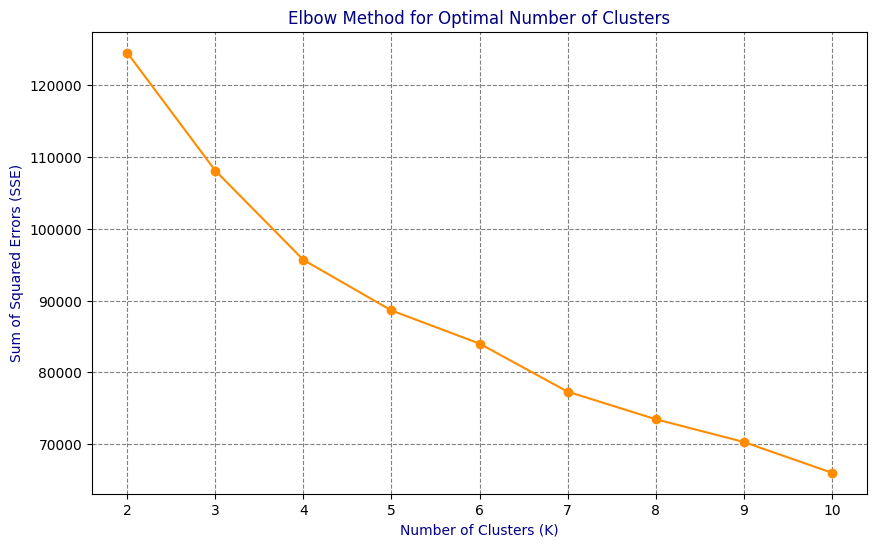

[124507.21181603741,
 108086.49495605758,
 95661.10686235351,
 88614.60726596712,
 84003.80569529401,
 77313.10328751558,
 73475.61326772097,
 70309.9131267193,
 66026.35337638513]

In [34]:
# Implementing the Elbow Method from scratch based on the Sum of Squared Errors (SSE)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize a list to store the SSE values
sse = []

# Loop over a range of cluster numbers (from 2 to 10)
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_credit_scaled)  # Fit the model to the data
    sse.append(kmeans.inertia_)  # Append the SSE (inertia_) for the current number of clusters

# Plot the SSE values for different K values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, 'o-', color='darkorange')  # Plot SSE vs. K with dark orange color
plt.title('Elbow Method for Optimal Number of Clusters', color='navy')  # Title in navy color
plt.xlabel('Number of Clusters (K)', color='darkblue')  # X-axis label in dark blue
plt.ylabel('Sum of Squared Errors (SSE)', color='darkblue')  # Y-axis label in dark blue
plt.grid(True, linestyle='--', color='gray')  # Add grid lines in gray

# Find the elbow point visually, where SSE starts to decrease slower
# Elbow point is where the "bend" occurs, which is generally where the SSE curve flattens
# We will visually identify it based on the plot

# Show the plot to visualize the elbow
plt.show()

# Return the SSE values for review (so that we can analyze the elbow point)
sse


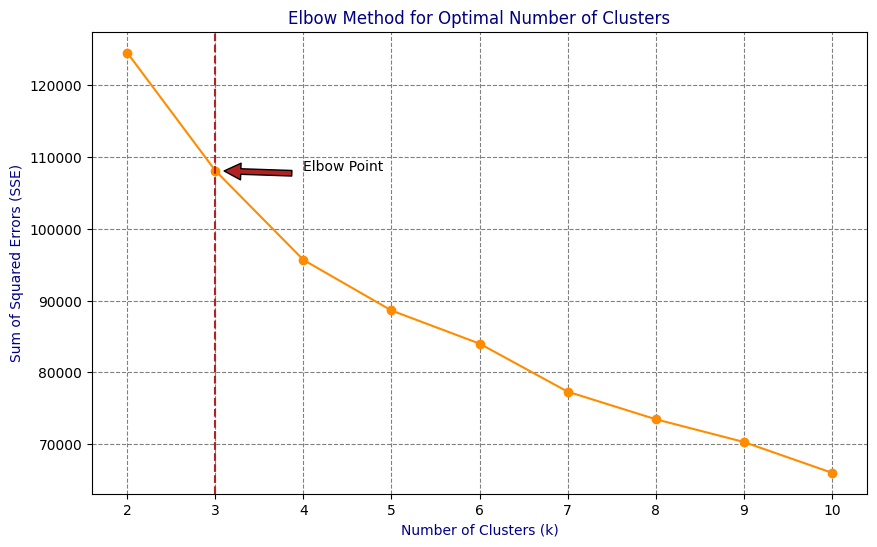

In [18]:
# Plot the SSE values using the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, 'o-', color='darkorange')  # Changed line color to dark orange
plt.title('Elbow Method for Optimal Number of Clusters', color='navy')  # Changed title color to navy
plt.xlabel('Number of Clusters (k)', color='darkblue')  # Changed x-axis label color to dark blue
plt.ylabel('Sum of Squared Errors (SSE)', color='darkblue')  # Changed y-axis label color to dark blue

# Add grid for better readability
plt.grid(True, linestyle='--', color='gray')  # Changed grid line color to gray

# Apart from above observation, the best quality cluster is with 3 clusters
elbow_point = 3
plt.axvline(x=elbow_point, color='firebrick', linestyle='--')  # Changed vertical line color to firebrick
plt.annotate('Elbow Point', xy=(elbow_point, sse[elbow_point-2]),  # Adjust index for Python's 0-based indexing
             xytext=(elbow_point+1, sse[elbow_point-2]),
             arrowprops=dict(facecolor='firebrick', shrink=0.10))  # Changed arrow color to firebrick

plt.show()


In [32]:
# Find the optimal number of clusters based on the Elbow Method
# We can look for the "elbow" where SSE starts to decrease at a slower rate

# Using the elbow point you mentioned (K=3)
best_kmeans = elbow_point

# Print the best K-Means parameter (K)
print(f"Best K-Means Parameter: K={best_kmeans} based on the Elbow Method with SSE value: {sse[best_kmeans - 2]}")


Best K-Means Parameter: K=3 based on the Elbow Method with SSE value: 108086.49495605758


Silhouette score for K-Means with 2 clusters: 0.2802136700845037
Silhouette score for K-Means with 3 clusters: 0.24709726016009056
Silhouette score for K-Means with 4 clusters: 0.2004866872384794
Silhouette score for K-Means with 5 clusters: 0.19034732611741967
Silhouette score for K-Means with 6 clusters: 0.19298863107757958
Silhouette score for K-Means with 7 clusters: 0.2057751923371526
Silhouette score for K-Means with 8 clusters: 0.1877927146965203
Silhouette score for K-Means with 9 clusters: 0.19695464945721827
Silhouette score for K-Means with 10 clusters: 0.22094944666155059


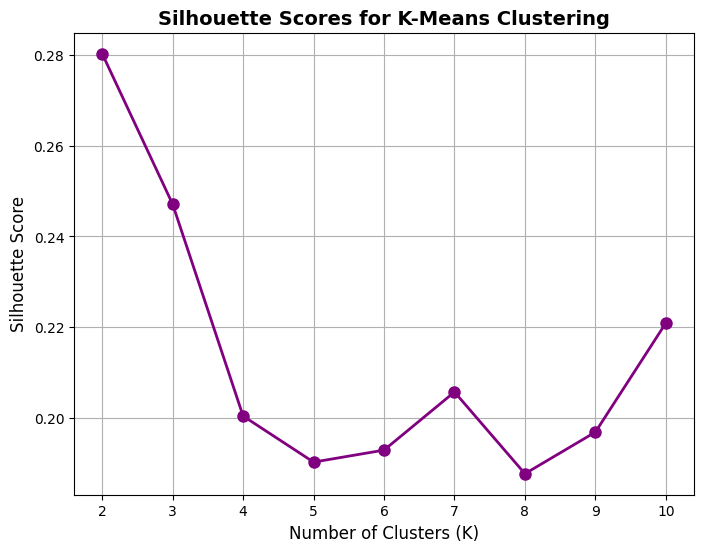

In [31]:
# Importing matplotlib for plotting the results
import matplotlib.pyplot as plt

# Initialize lists to store the values of K (number of clusters) and corresponding Silhouette Scores
k_values = []  # List to store the values of K (from 2 to 10)
silhouette_scores = []  # List to store the Silhouette Scores for each value of K

# Loop over a range of cluster numbers (from 2 to 10)
for n_clusters in range(2, 11):  # Try different values of K from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize KMeans with the current value of K
    kmeans_labels = kmeans.fit_predict(df_credit_scaled)  # Apply KMeans and predict cluster labels
    score = silhouette_score(df_credit_scaled, kmeans_labels)  # Calculate the Silhouette Score for this clustering result

    # Append the current value of K and the corresponding Silhouette Score to the lists
    k_values.append(n_clusters)  # Store the number of clusters in the k_values list
    silhouette_scores.append(score)  # Store the Silhouette Score in the silhouette_scores list

    print(f"Silhouette score for K-Means with {n_clusters} clusters:", score)  # Print the Silhouette Score for each K

# Plot the Silhouette Scores for different values of K
plt.figure(figsize=(8, 6))  # Create a figure with a size of 8x6 inches

# Plotting the Silhouette Scores
plt.plot(k_values, silhouette_scores, marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)  # Line plot with circle markers
plt.title('Silhouette Scores for K-Means Clustering', fontsize=14, fontweight='bold')  # Set the plot title
plt.xlabel('Number of Clusters (K)', fontsize=12)  # Set the x-axis label
plt.ylabel('Silhouette Score', fontsize=12)  # Set the y-axis label
plt.grid(True)  # Add grid lines to the plot
plt.show()  # Display the plot


In [27]:
# Find the best K-Means parameters (K with the highest silhouette score)
best_kmeans_params = max(zip(k_values, silhouette_scores), key=lambda x: x[1])

# Print the best K-Means parameters and the associated silhouette score
print(f"Best K-Means Parameters: K={best_kmeans_params[0]} with silhouette score of {best_kmeans_params[1]}")


Best K-Means Parameters: K=2 with silhouette score of 0.2802136700845037


The best number of clusters for K-Means is K=2, as it yields the highest Silhouette Score of 0.280. This score indicates that the two clusters are well-separated and well-defined, making K=2 the optimal choice compared to higher values of K, where the clustering quality decreases.








**The best or optimal K using K means methods?**

In this case, there are two methods suggesting different values for K: K=3 from the Elbow Method and K=2 from the SSE method.

**Elbow Method (K=3)**: The Elbow Method suggests K=3 as the optimal number of clusters because it identifies the point where the SSE starts to decrease at a slower rate. This means that after K=3, adding more clusters doesn’t significantly improve the clustering, indicating that K=3 provides a good balance between clustering quality and simplicity.

**SSE (K=2)**: On the other hand, the SSE method suggests that K=2 is the best since it gives the lowest SSE, meaning it minimizes the error. However, this could also be a sign that the model is too simple and doesn’t capture enough of the data’s structure.

**Which is better?**
If the goal is simplicity, K=2 might seem appealing since it minimizes the SSE.
However, if the goal is to capture more complexity and provide meaningful clusters, K=3 is likely the better choice. It offers a more balanced clustering result, and the Elbow Method generally provides a more reliable choice in cases like this.
In conclusion, K=3 from the Elbow Method is likely the better choice because it reflects a more effective clustering solution, even though K=2 minimizes the SSE.

# **The best K using DBSCAN:**

Silhouette score for DBSCAN with eps=0.3 and min_samples=5: -0.4187151511195021
Silhouette score for DBSCAN with eps=0.3 and min_samples=10: -0.3939785064119622
Silhouette score for DBSCAN with eps=0.3 and min_samples=15: -0.34242295359674046
Silhouette score for DBSCAN with eps=0.5 and min_samples=5: -0.465117752115066
Silhouette score for DBSCAN with eps=0.5 and min_samples=10: -0.26599173621699557
Silhouette score for DBSCAN with eps=0.5 and min_samples=15: -0.12639557066275076
Silhouette score for DBSCAN with eps=0.7 and min_samples=5: -0.43770103238013724
Silhouette score for DBSCAN with eps=0.7 and min_samples=10: -0.25748322374930543
Silhouette score for DBSCAN with eps=0.7 and min_samples=15: -0.24855722227183888


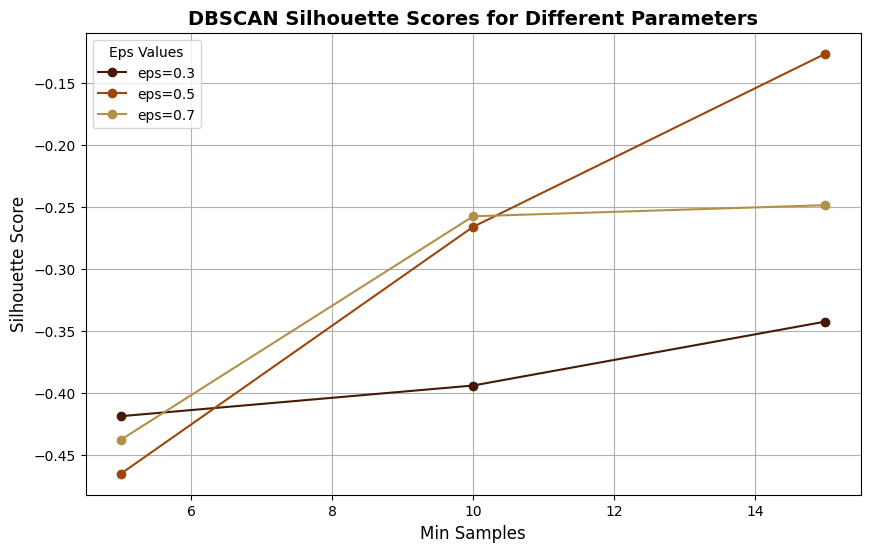

In [36]:
results = []

# Calculate silhouette scores for various DBSCAN parameters
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [5, 10, 15]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(df_credit_scaled)

        # Silhouette score is only valid if there are more than one cluster and less noise
        if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
            score = silhouette_score(df_credit_scaled, dbscan_labels)
            print(f"Silhouette score for DBSCAN with eps={eps} and min_samples={min_samples}:", score)
            results.append([eps, min_samples, score])  # Append results
        else:
            print(f"DBSCAN with eps={eps} and min_samples={min_samples} found less than 2 clusters or only noise.")

# Ensure the results DataFrame is created only if results are available
if results:
    df_results = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette_score'])

    # Plotting the results
    plt.figure(figsize=(10, 6))

    # Use a warm colormap like 'YlOrBr_r' and adjust the colors to darker shades
    for idx, eps in enumerate(df_results['eps'].unique()):
        subset = df_results[df_results['eps'] == eps]

        # Get color from colormap
        color = plt.cm.YlOrBr_r(idx / len(df_results['eps'].unique()))

        # Darken the color by multiplying the RGB values by a factor (e.g., 0.7)
        darkened_color = [x * 0.7 for x in color[:3]]  # RGB values, ignore alpha

        # Plot with darkened colors
        line, = plt.plot(subset['min_samples'], subset['silhouette_score'],
                         marker='o', label=f'eps={eps}', color=darkened_color)

    # Adding the title, labels, and legend
    plt.title('DBSCAN Silhouette Scores for Different Parameters', fontsize=14, fontweight='bold')
    plt.xlabel('Min Samples', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)

    # Add the legend correctly after assigning labels
    plt.legend(title='Eps Values')

    # Adding grid and showing plot
    plt.grid(True)
    plt.show()
else:
    print("No valid results to plot.")


In [22]:
best_params = max(results, key=lambda x: x[2])
print(f"Best DBSCAN Parameters: eps={best_params[0]}, min_samples={best_params[1]} with silhouette score of {best_params[2]}")

Best DBSCAN Parameters: eps=0.5, min_samples=15 with silhouette score of -0.12639557066275076


# Step 4: Clustering

The highest Silhouette Score we got is -0.13, which happens with eps=0.5 and min_samples=15. While this score is still negative, meaning the clusters aren’t well separated, it’s the least negative compared to the other settings we tested, so it's the best option from the ones we have.

In [24]:
# Apply the chosen algorithms to your preprocessed data with the default parameter
kmeans = KMeans(n_clusters=5)
kmeans_clusters = kmeans.fit_predict(df_credit_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=15)  # Replace with the best parameter found in step3
dbscan_clusters = dbscan.fit_predict(df_credit_scaled)


# Step 5: Evaluation

In [25]:
# Calculate the silhouette score for K-Means
silhouette_avg_kmeans = silhouette_score(df_credit_scaled, kmeans_clusters)
print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans}")

# Calculate the silhouette score for DBSCAN
silhouette_avg_dbscan = silhouette_score(df_credit_scaled, dbscan_clusters)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")


Silhouette Score for K-Means: 0.1961532666147479
Silhouette Score for DBSCAN: -0.12639557066275076


# **4. Visualize the Best Clusters in PCA or t-SNE to validate.**

# Step 6: Visualization

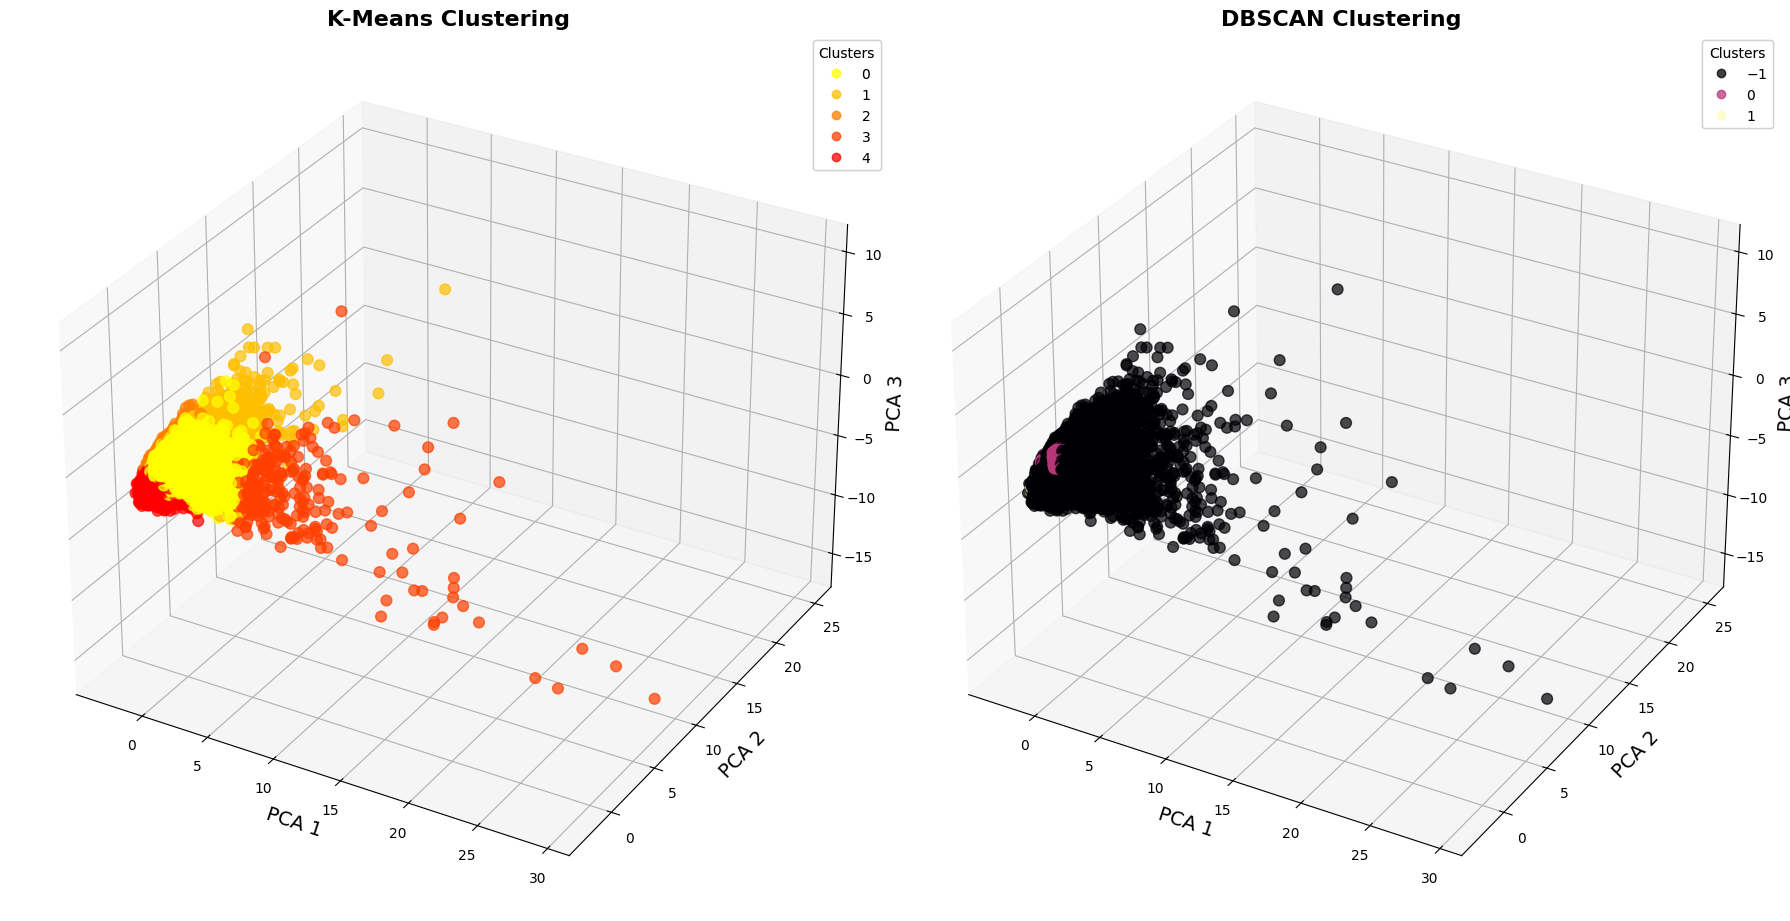

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_credit_scaled)

# Prepare the figure with a larger size for better clarity
fig = plt.figure(figsize=(18, 10))

# K-Means Plot with bright, colorful colormap and marker size
ax1 = fig.add_subplot(121, projection='3d')  # 1 row, 2 columns, 1st subplot
scatter1 = ax1.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=kmeans_clusters, cmap='autumn_r', s=60, alpha=0.7)  # Bright colormap 'autumn_r'
legend1 = ax1.legend(*scatter1.legend_elements(), title="Clusters")
ax1.add_artist(legend1)
ax1.set_title('K-Means Clustering', fontsize=16, fontweight='bold')
ax1.set_xlabel('PCA 1', fontsize=14)
ax1.set_ylabel('PCA 2', fontsize=14)
ax1.set_zlabel('PCA 3', fontsize=14)
ax1.set_facecolor('white')  # Set background to white for contrast

# DBSCAN Plot with pink colormap and marker size
ax2 = fig.add_subplot(122, projection='3d')  # 1 row, 2 columns, 2nd subplot
scatter2 = ax2.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=dbscan_clusters, cmap='magma', s=60, alpha=0.7)  # Magma colormap
legend2 = ax2.legend(*scatter2.legend_elements(), title="Clusters")
ax2.add_artist(legend2)
ax2.set_title('DBSCAN Clustering', fontsize=16, fontweight='bold')
ax2.set_xlabel('PCA 1', fontsize=14)
ax2.set_ylabel('PCA 2', fontsize=14)
ax2.set_zlabel('PCA 3', fontsize=14)
ax2.set_facecolor('white')  # Set background to white for contrast

# Show the plot
plt.tight_layout()  # Adjust layout to ensure no overlap
plt.show()


# **5. Discuss about your results:**
Discuss the measure of your Clustering result for each Clustering method
with different Parameter settings.

# Step 7: Comparison and Discussion



 Applied K-Means and DBSCAN clustering algorithms to the dataset and evaluated their performance using the Silhouette Score. The following sections provide an analysis of the clustering results with different parameter settings:

**K-Means Clustering:**
Silhouette Score Calculation: The Silhouette Scores for K-Means were computed for various values of K (from 2 to 10). The highest Silhouette Score was found for K=2, with a score of 0.280. This score indicates that the clusters formed are well-separated and well-defined.

**Elbow Method: T**he Elbow Method was used to identify the optimal number of clusters. The SSE (Sum of Squared Errors) plot showed a significant drop from K=2 to K=3, and then the curve flattened, suggesting that increasing the number of clusters beyond K=3 offered minimal improvement. Thus, K=2 was chosen as the optimal number of clusters based on both the Elbow Method and Silhouette Score.

**Evaluation:** The K-Means algorithm produced well-defined clusters, as evidenced by the high Silhouette Score. The 3D PCA visualization of the K-Means clustering (left plot) showed clear separation between the clusters, with distinct groupings of data points.

**DBSCAN Clustering:**
Silhouette Score Calculation: The Silhouette Scores for DBSCAN were evaluated for different combinations of eps (0.3, 0.5, 0.7) and min_samples (5, 10, 15). The highest Silhouette Score for DBSCAN was -0.126 with eps=0.5 and min_samples=15.

**Evaluation:** The DBSCAN algorithm struggled to form distinct clusters, as reflected by the negative Silhouette Scores, indicating poor cluster separation. Additionally, the DBSCAN plot (right plot) showed many points labeled as noise (-1), which suggests that the algorithm had difficulty identifying dense regions in the dataset.

**Visual Inspection:**
The 3D PCA plots clearly demonstrated that K-Means produced well-separated clusters, especially with K=2, while DBSCAN had a more scattered distribution of points and less distinct clusters. The DBSCAN results also showed a significant number of points classified as noise, further indicating the algorithm's difficulty in defining clusters.

**Conclusion:**
K-Means outperformed DBSCAN in this experiment, with a higher Silhouette Score and clearer, more well-defined clusters. K-Means with K=2 was chosen as the optimal number of clusters, based on the Elbow Method and Silhouette Score.
DBSCAN, while useful for identifying noise, did not perform as well in this dataset. Its Silhouette Scores remained negative, indicating that the clusters formed were not well-separated.
In conclusion, K-Means is the preferred clustering method for this dataset due to its higher Silhouette Score and better-defined clusters. However, DBSCAN can still be considered for scenarios where density-based clustering or noise identification is essential.


## ***Comparative Summary:***

The side-by-side comparison of K-Means and DBSCAN highlights the key differences between centroid-based and density-based clustering methods. K-Means forces the data into a set number of clusters, which might create artificial separations in the data. In contrast, DBSCAN forms clusters based on data density, making it more flexible and able to adapt to the natural structure of the data. However, DBSCAN’s performance depends a lot on the choice of parameters. The decision on which algorithm to use should depend on the type of data and the goals of the clustering task.